In [3]:
%cd /content/drive/MyDrive/ML2021/
!pwd

/content/drive/MyDrive/ML2021
/content/drive/MyDrive/ML2021


In [8]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import transforms
import math
import matplotlib.animation as animation

In [18]:
PointX_g = []
PointY_g = []
tx_g = np.array([])
ty_g = np.array([])
for i in range(24):#44
    for j in range(0,10,2):
        file_path = "npy_GPS_2/np_"
        PointX, PointY, tx, ty = np.load(file_path+str(i)+"_"+str(j)+".npy", allow_pickle=True, encoding = 'latin1')
        PointX_g.append(PointX)
        PointY_g.append(PointY)
        tx_g = np.append(tx_g,tx)
        ty_g = np.append(ty_g,ty)

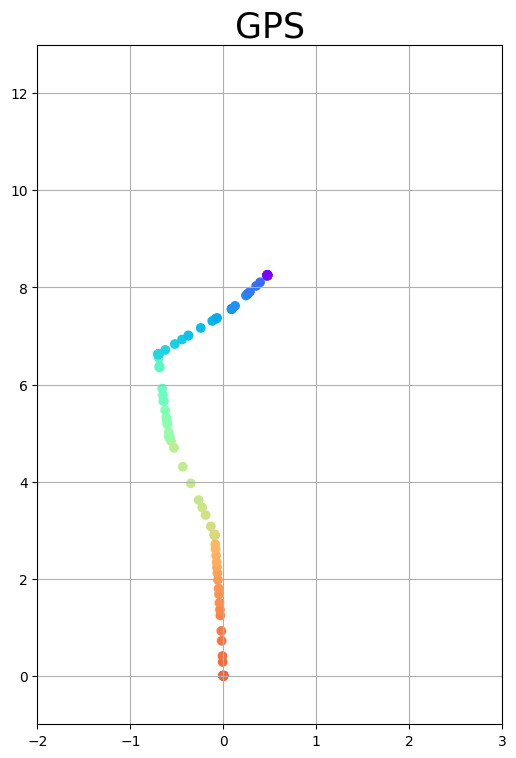

In [22]:
## without width
fig, ax = plt.subplots(figsize=(6,9),dpi=100)
base = plt.gca().transData
rotation = transforms.Affine2D().rotate_deg(55)#92

plt.grid(True)
plt.title("GPS", fontsize=25)
colors = cm.rainbow(np.linspace(1, 0, np.asarray(tx_g).shape[0]))
plt.scatter(tx_g, ty_g, c=colors, transform = rotation + base)
plt.xlim((-2, 3))
plt.ylim((-1, 13))
# plt.xlim((3, 9))
# plt.ylim((6, 20))
plt.rcParams['animation.html'] = 'html5'

baseFoot, = ax.plot([],[],linestyle='None',markersize=30, marker='*', color='r', transform=rotation + base, markeredgecolor='k',markeredgewidth=2)

scan, = ax.plot([],[],linestyle='None',markersize=6, marker='o',color='sienna', transform=rotation + base)

frame_template = 'frame = %.1fth'
fra_text = ax.text(0.05,0.9,'',transform=ax.transAxes, fontsize = 22)

def init():
    baseFoot.set_data([],[])
    scan.set_data([],[])

    fra_text.set_text('')
    
    return baseFoot, scan, fra_text

def animate(i):
    baseFoot.set_data([tx_g[i]],[ty_g[i]])
    scan.set_data([PointX_g[i]],[PointY_g[i]])
    
    fra_text.set_text(frame_template % i)
    
    return baseFoot, scan, fra_text

ani_a = animation.FuncAnimation(fig, animate, \
         np.arange(1,120), \
         interval=400,blit=False,init_func=init)

ani_a.save('GPS_Control_2.mp4',fps=5)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

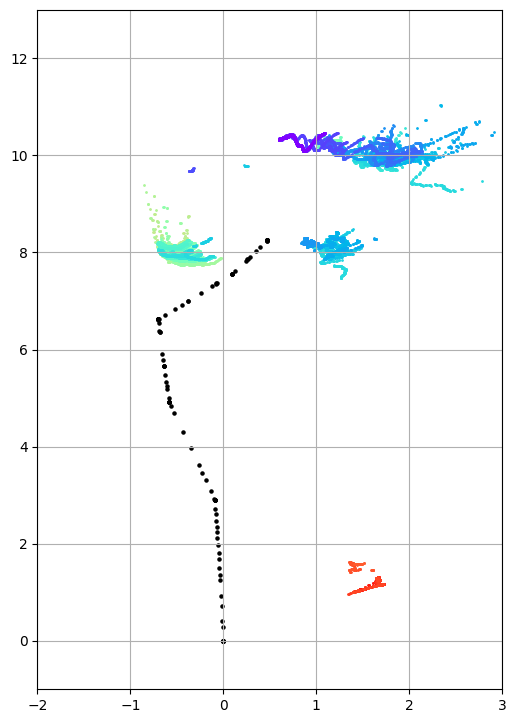

In [23]:
colors = cm.rainbow(np.linspace(1, 0, np.asarray(tx_g).shape[0]))
fig, ax = plt.subplots(figsize=(6,9),dpi=100)
plt.grid(True)
base = plt.gca().transData
rotation = transforms.Affine2D().rotate_deg(55)#92
for i in range(len(tx_g)):
  plt.scatter(PointX_g[i],PointY_g[i], c=colors[i], transform = rotation + base, s=1)
plt.scatter(tx_g, ty_g, c='k', transform = rotation + base, s=5)
plt.xlim((-2, 3))
plt.ylim((-1, 13))
plt.show()

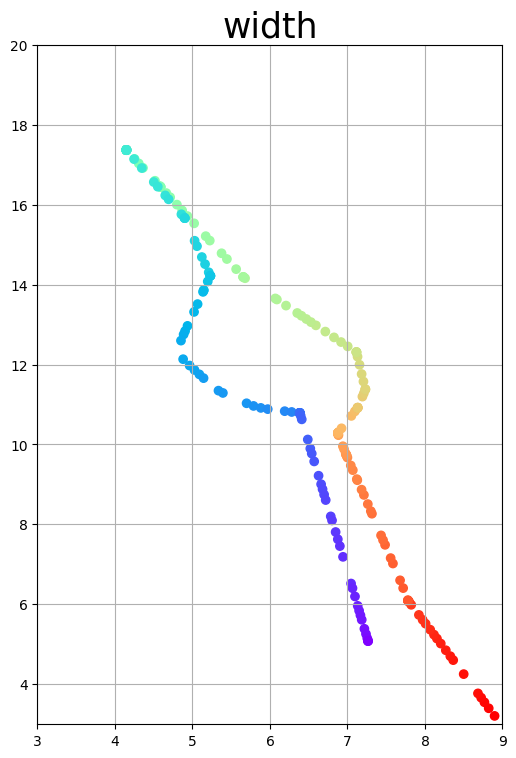

In [14]:
fig, ax = plt.subplots(figsize=(6,9),dpi=100)
base = plt.gca().transData
rotation = transforms.Affine2D().rotate_deg(135)#92

plt.grid(True)
plt.title("width", fontsize=25)
colors = cm.rainbow(np.linspace(1, 0, np.asarray(tx_g).shape[0]))
plt.scatter(tx_g, ty_g, c=colors, transform = rotation + base)
plt.xlim((3, 9))
plt.ylim((3, 20))
plt.rcParams['animation.html'] = 'html5'

baseFoot, = ax.plot([],[],linestyle='None',markersize=30, marker='*', color='r', transform=rotation + base, markeredgecolor='k',markeredgewidth=2)

scan, = ax.plot([],[],linestyle='None',markersize=6, marker='o',color='sienna', transform=rotation + base)

widthPlot, = ax.plot([], [], color='red',transform=rotation + base, linewidth=4)

frame_template = 'frame = %.1fth'
fra_text = ax.text(0.05,0.9,'',transform=ax.transAxes, fontsize = 22)

width_template = "[Width: %fmm]"
width_text = ax.text(0.65,0.6,'',transform=ax.transAxes, fontsize = 18)

def init():
    baseFoot.set_data([],[])
    scan.set_data([],[])
    widthPlot.set_data([],[])

#     line.set_data([],[])
    fra_text.set_text('')
    width_text.set_text('')
    #wgt_text.set_text('')
    return baseFoot, scan, fra_text, width_text#, wgt_text

def animate(i):
    baseFoot.set_data([tx_g[i]],[ty_g[i]])
    scan.set_data([PointX_g[i]],[PointY_g[i]])
    if len(PointX_g[i]) != 0:
      widthPlot.set_data((PointX_g[i][0], PointX_g[i][-1]),(PointY_g[i][0], PointY_g[i][-1]))
      int_width = PointY_g[i][0]*1000-PointY_g[i][-1]*1000
      width_text.set_text(width_template % int_width)

    fra_text.set_text(frame_template % i)
    
    #wgt_text.set_text(wgt_template % m2[i])
    return baseFoot, scan, fra_text, width_text#, wgt_text

ani_a = animation.FuncAnimation(fig, animate, \
         np.arange(1,219), \
         interval=400,blit=False,init_func=init)

ani_a.save('width_Control_try.mp4',fps=5)
plt.show()

In [15]:
rot = np.array([[-1.        , -0.        ,  0.        ],
                [ 0.        , -0.84535029, -0.53421239],
                [ 0.        , -0.53421239,  0.84535029]])
              [[  0.84535029,   0.53421239,   0.30437673],
              [ -0.53421239,   0.84535029, -10.78079694],
              [  0.        ,   0.        ,   1.        ]]
              (-0.5635757801256498, -0.0, 3.141592653589793))

In [16]:
np.linalg.inv(rot)

array([[-1.       , -0.       , -0.       ],
       [-0.       , -0.8453503, -0.5342124],
       [ 0.       , -0.5342124,  0.8453503]])

In [17]:
0.5/3.14159*180

28.64791395439889

In [ ]:
[-1. ,  0.        ,  0.        ]
[ 0. , -0.79658341,  0.60452864]
[ 0. ,  0.60452864,  0.79658341]

(0.65, -0.0, 3.14)
[np.cos(yaw),-np.sin(yaw), tx]
[np.sin(yaw), np.cos(yaw), ty]
[  0.       ,   0.       , 1]